# **𝓡𝓮𝓽𝓸 𝓣𝓲𝓽𝓪𝓷𝓲𝓬**


    𝒯𝑒𝒶𝓂 𝓂𝑒𝒷𝑒𝓇𝓈
    Nallely Serna    A00833111
    Sofía Cantú      A01571120
    Ozner Leyva      A01742377
    Fernanda Perez   A01742102


## **Import libraries**

In [ ]:
#!pip install pandas scikit-learn catboost numpy matplotlib seaborn

# Data processing and analysis libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Preprocessing and cross validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict

# CatBoost for boosting models
from catboost import CatBoostClassifier, Pool, cv

## **Exploratory Analysis**

In [ ]:
df = pd.read_csv('train.csv', index_col=0)

#The first 5 rows of the dataset to understand its structure
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Stats for numerical variables
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Percentage of missing values in the columns
missing_values = df.isnull().mean().round(4) * 100
missing_values = missing_values[missing_values > 0]
missing_values

,0
Age,19.87
Cabin,77.10
Embarked,0.22


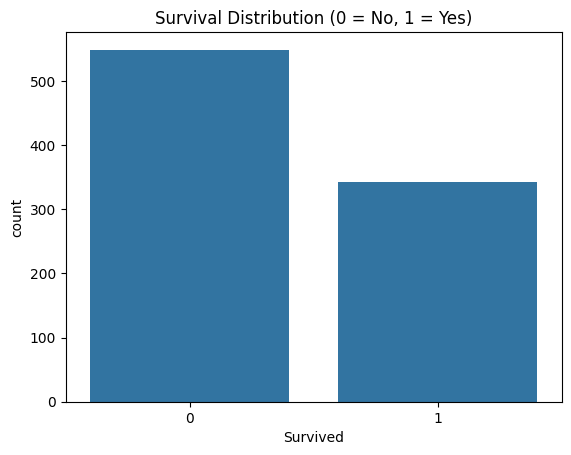

In [ ]:
# Distribution of the variable: 'Survived'
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution (0 = No, 1 = Yes)')
plt.show()

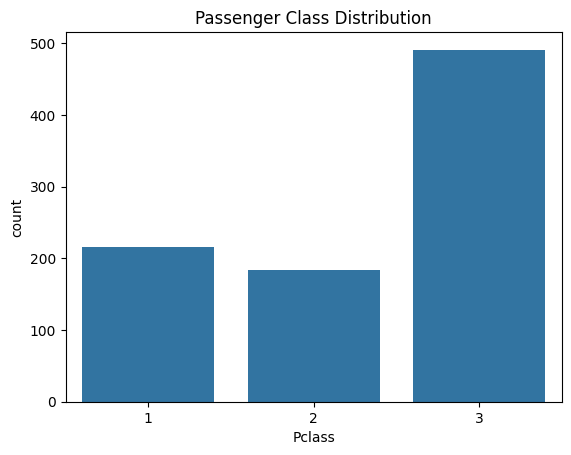

In [ ]:
# Distribution of varieble: 'Pclass'
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

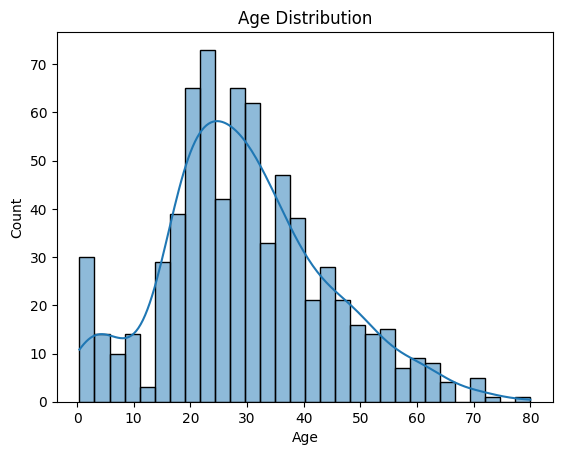

In [ ]:
# Age distribution
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

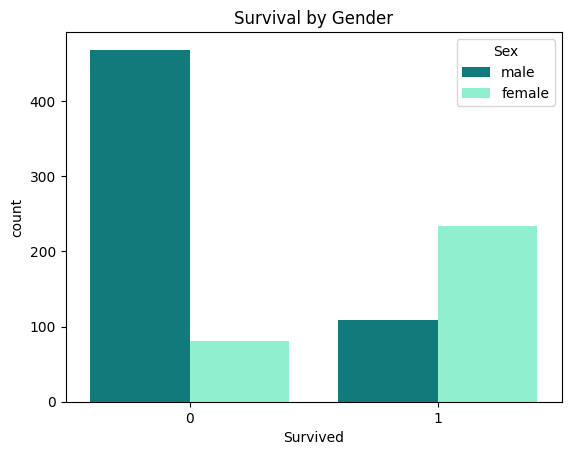

In [ ]:
# Survival comparison by gender
custom_palette = ['darkcyan', 'aquamarine']
sns.countplot(x='Survived', hue='Sex', data=df, palette=custom_palette)
plt.title('Survival by Gender')
plt.show()

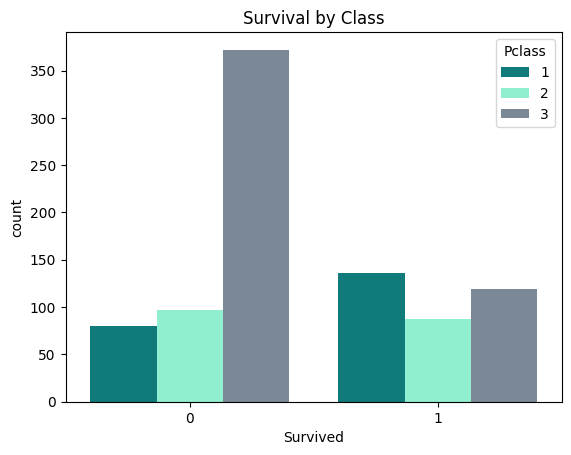

In [ ]:
# Survival comparison by class
custom_palette = ['darkcyan', 'aquamarine', 'lightslategrey']
sns.countplot(x='Survived', hue='Pclass', data=df, palette=custom_palette)
plt.title('Survival by Class')
plt.show()

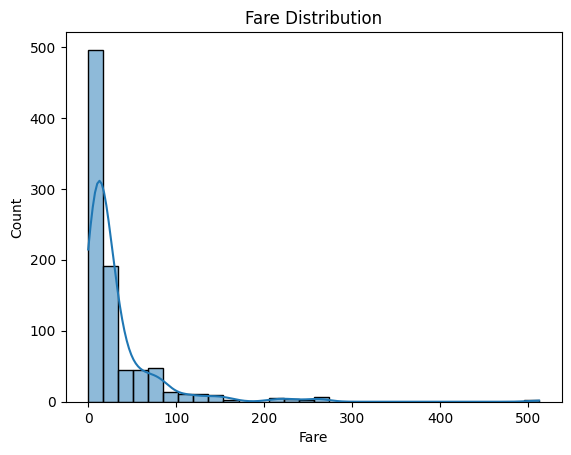

In [ ]:
# Analysis of the fare paid
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.show()

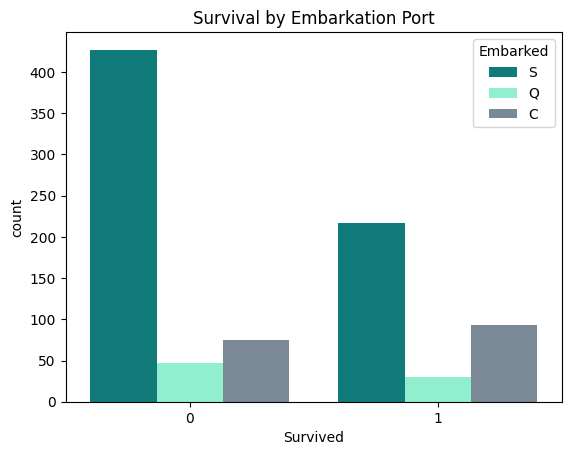

In [ ]:
# Survival comparison by embarkation port
custom_palette = ['darkcyan', 'aquamarine', 'lightslategrey']
sns.countplot(x='Survived', hue='Embarked', data=df, palette=custom_palette)
plt.title('Survival by Embarkation Port')
plt.show()

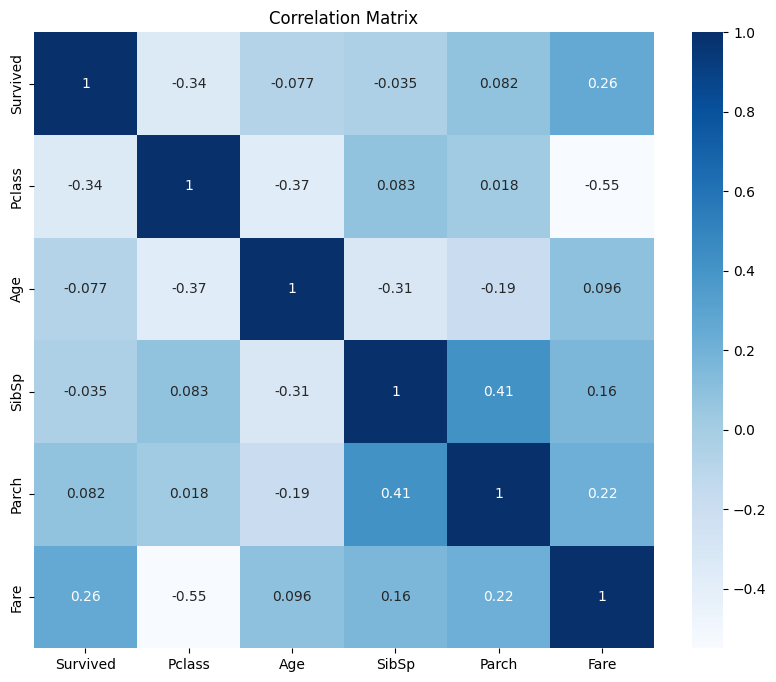

In [ ]:
# Correlation matrix between numerical variables
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

## **Cleaning the data**

First of all, the data must be observed. Looking at the dataset information, we can see which are the types of values we are going to work with and which of the data we are interested in will require an imputation method to be applied to them.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


<Axes: >

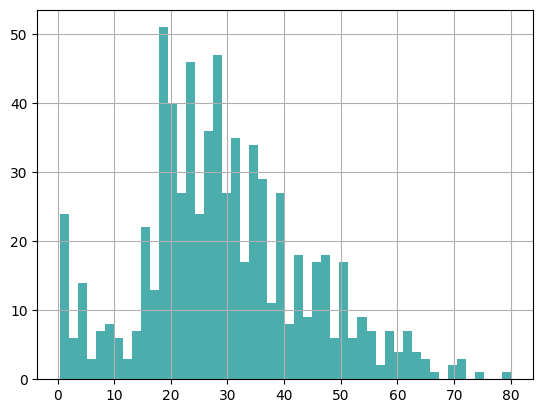

In [ ]:
df["Age"].hist(bins=50, color='darkcyan', alpha=0.7)

We will use the median to fill the null values in Age

<Axes: >

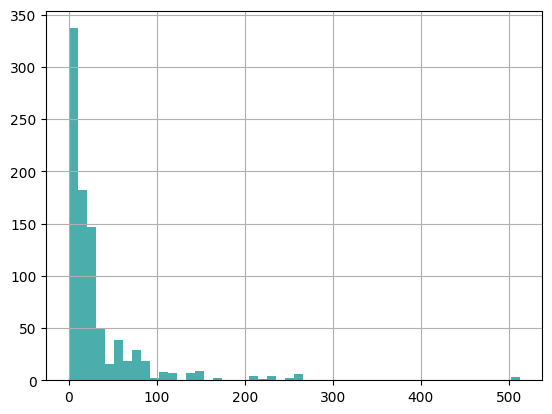

In [ ]:
df["Fare"].hist(bins=50, color='darkcyan', alpha=0.7)

We will use the median to fill the null values in Fare

<Axes: >

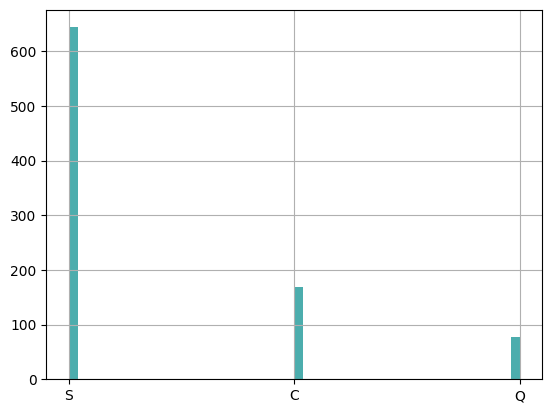

In [ ]:
df["Embarked"].hist(bins=50, color='darkcyan', alpha=0.7)

We will use mode to fill the null values in Embarked

**We know that there is 77.1% of missing data in the 'cabin' column, we tried to fill it using a knn model but we did not have a good accuracy, then we decided to try with random forest, and after several more attempts we decided to eliminate the 'cabin' column as we did not get the expected results to fill this column and it did not add something good to our results so it is better not to use the column.**

## **Model Selection**

Due the nature of the problem (lots of categorical variables) we will include CatBoost into the comparison of models.

In [ ]:
def basic_preprocess_data(data):
    data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data['Fare'].fillna(data['Fare'].median(), inplace=True)
    data['Sex'] = data['Sex'].map({'female': 1, 'male': 0})
    data = pd.get_dummies(data, columns=['Embarked'])
    return data

def compare_models(train, test, X_train, y_train, X_test, y_test):

    train.columns = train.columns.str.lower()
    test.columns = test.columns.str.lower()

    features = X_train
    target = y_train

    train_for_cat = train.copy()
    test_for_cat = test.copy()
    train_features_for_cat = train_for_cat.drop('survived', axis=1)
    train_target_for_cat = train_for_cat['survived']
    test_features_for_cat = test_for_cat.drop('survived', axis=1)
    test_target_for_cat = test_for_cat['survived']

    features_index = np.where(train_features_for_cat.dtypes != float)[0]

    cat = CatBoostClassifier(loss_function='Logloss',
                         eval_metric='Accuracy',
                         random_seed=42,
                         verbose=False)

    cat.fit(train_features_for_cat, train_target_for_cat, cat_features=features_index)

    x_train_for_cat = train_features_for_cat
    x_test_for_cat = test_features_for_cat
    y_train_for_cat = train_target_for_cat
    y_test_for_cat = test_target_for_cat

    cat_features_index = np.where(train_features_for_cat.dtypes != float)[0]

    dct_with_models = {}

    for label_model, model in {'RF': [RandomForestClassifier(random_state=42), 'no_scaler'],
                            'DT': [DecisionTreeClassifier(random_state=42), 'no_scaler'],
                            'LR': [LogisticRegression(random_state=42), 'need_scaler'],
                            'KNB': [KNeighborsClassifier(), 'need_scaler'],
                            'SVC': [SVC(random_state=42, probability=True), 'need_scaler'],
                            'CAT': [CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy', verbose=False, use_best_model=True, random_seed=42), 'cat']}.items():


        if model[1] == 'need_scaler':
            scaled_features = StandardScaler().fit_transform(features)
            scores = cross_val_score(model[0], scaled_features, target, cv=9, scoring='accuracy')
            scaler = StandardScaler()
            scaled_train = scaler.fit_transform(X_train)
            scaled_test = scaler.transform(X_test)
            model[0].fit(scaled_train, y_train)
            dct_with_models[f'{label_model}_overall_accuracy_for_model_for_dataset'] = np.mean(scores)
            dct_with_models[f'{label_model}_accuracy_for_x_test_with_default_params'] = accuracy_score(y_test, model[0].predict(scaled_test))
            dct_with_models[f'{label_model}_roc_auc_for_x_test_with_default_params'] = roc_auc_score(y_test, model[0].predict_proba(scaled_test)[:,1])

        elif model[1] == 'no_scaler':
            scores = cross_val_score(model[0], features, target, cv=9, scoring='accuracy')
            model[0].fit(X_train, y_train)
            dct_with_models[f'{label_model}_overall_accuracy_for_model_for_dataset'] = np.mean(scores)
            dct_with_models[f'{label_model}_accuracy_for_x_test_with_default_params'] = accuracy_score(y_test, model[0].predict(X_test))
            dct_with_models[f'{label_model}_roc_auc_for_x_test_with_default_params'] = roc_auc_score(y_test, model[0].predict_proba(X_test)[:,1])

        elif model[1] == 'cat':
            scores = cv(Pool(train_features_for_cat, train_target_for_cat, cat_features=cat_features_index),
                        {"loss_function": "Logloss",
                        "eval_metric": "Accuracy",
                        "verbose": False,
                        "random_seed": 42},
                        fold_count=5)
            model[0].fit(x_train_for_cat, y_train_for_cat,
                        cat_features=cat_features_index,
                        eval_set=(x_test_for_cat, y_test_for_cat),
                        verbose=True,
                        plot=False)
            dct_with_models[f'{label_model}_overall_accuracy_for_model_for_dataset'] = scores['test-Accuracy-mean'].mean()
            dct_with_models[f'{label_model}_accuracy_for_x_test_with_default_params'] = accuracy_score(y_test_for_cat, model[0].predict(x_test_for_cat))
            dct_with_models[f'{label_model}_roc_auc_for_x_test_with_default_params'] = roc_auc_score(y_test_for_cat, model[0].predict_proba(x_test_for_cat)[:,1])
    model = []
    overall_accuracy_for_dataset = []
    accuracy_for_x_test_with_default_params = []
    roc_auc_for_x_test_with_default_params = []

    for name_model in ['DT', 'RF', 'LR', 'KNB', 'SVC', 'CAT']:
        model.append(name_model)
        overall_accuracy_for_dataset.append(dct_with_models[f'{name_model}_overall_accuracy_for_model_for_dataset'])
        accuracy_for_x_test_with_default_params.append(dct_with_models[f'{name_model}_accuracy_for_x_test_with_default_params'])
        roc_auc_for_x_test_with_default_params.append(dct_with_models[f'{name_model}_roc_auc_for_x_test_with_default_params'])

    results = {
    'Model' : model,
    'OVERALL ACCURACY FOR TRAIN DATASET' : pd.Series(overall_accuracy_for_dataset),
    'ROC_AUC FOR X_TEST WITH DEFAULT PARAMS' : pd.Series(roc_auc_for_x_test_with_default_params),
    'ACCURACY FOR X_TEST WITH DEFAULT PARAMS' : pd.Series(accuracy_for_x_test_with_default_params)}

    display(pd.DataFrame(results).style.highlight_max(color='green'))

In [ ]:
train = pd.read_csv("train.csv", index_col=0)
train = basic_preprocess_data(train)

y_train = train['Survived']
X_train = train.drop('Survived', axis=1)

len(X_train), len(y_train)

(891, 891)

In [ ]:
test = pd.read_csv('test_with_survived.csv', index_col=0)
test = basic_preprocess_data(test)

y_test = test['Survived']
X_test = test.drop(["Survived"], axis=1)

In [ ]:
compare_models(train, test, X_train, y_train, X_test, y_test)

Training on fold [0/5]

bestTest = 0.8100558659
bestIteration = 13

Training on fold [1/5]

bestTest = 0.8882681564
bestIteration = 60

Training on fold [2/5]

bestTest = 0.8595505618
bestIteration = 1

Training on fold [3/5]

bestTest = 0.7865168539
bestIteration = 130

Training on fold [4/5]

bestTest = 0.8192090395
bestIteration = 188

Learning rate set to 0.030798
0:	learn: 0.8226712	test: 0.7775120	best: 0.7775120 (0)	total: 3.36ms	remaining: 3.36s
1:	learn: 0.8193042	test: 0.7751196	best: 0.7775120 (0)	total: 9.02ms	remaining: 4.5s
2:	learn: 0.8204265	test: 0.7727273	best: 0.7775120 (0)	total: 12.2ms	remaining: 4.06s
3:	learn: 0.8193042	test: 0.7751196	best: 0.7775120 (0)	total: 15.7ms	remaining: 3.91s
4:	learn: 0.8170595	test: 0.7751196	best: 0.7775120 (0)	total: 18.4ms	remaining: 3.66s
5:	learn: 0.8260382	test: 0.7751196	best: 0.7775120 (0)	total: 21.9ms	remaining: 3.63s
6:	learn: 0.8226712	test: 0.7727273	best: 0.7775120 (0)	total: 25.4ms	remaining: 3.61s
7:	learn: 0.8249158	t

,Model,OVERALL ACCURACY FOR TRAIN DATASET,ROC_AUC FOR X_TEST WITH DEFAULT PARAMS,ACCURACY FOR X_TEST WITH DEFAULT PARAMS
0,DT,0.790123,0.710723,0.712919
1,RF,0.808081,0.799769,0.758373
2,LR,0.791246,0.811916,0.765550
3,KNB,0.800224,0.794292,0.717703
4,SVC,0.823793,0.810236,0.779904
5,CAT,0.814097,0.828201,0.799043


As we can see, CatBoost and SVM are the best models for this problem. We will use CatBoost as our base model for the moment.

## **Feature engineering**

...

## **Data Preprocessing Function**

In [ ]:
def preprocess_data(data):

    data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data['Fare'].fillna(data['Fare'].median(), inplace=True)
    data['Sex'] = data['Sex'].map({'female': 1, 'male': 0})
    data = pd.get_dummies(data, columns=['Embarked'])

    return data

## **Prepare the Data**

In [ ]:
train = pd.read_csv("train.csv", index_col=0)
train = preprocess_data(train)

y_train = train['Survived']
X_train = train.drop('Survived', axis=1)

len(X_train), len(y_train)

(891, 891)

In [ ]:
test = pd.read_csv('test_with_survived.csv', index_col=0)
test = preprocess_data(test)

y_test = test['Survived']
X_test = test.drop(["Survived"], axis=1)

len(X_test), len(y_test)

(418, 418)

## **Model**

We will use catboost, therefore we need to indicate the categorical features.

In [ ]:
cat_features = np.where(X_train.dtypes != float)[0]
cat_features

array([0, 1, 3, 4, 6, 7, 8])

Create the Model

In [ ]:
# fit the model
model = CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy', verbose=False, use_best_model=True, random_seed=42, cat_features=cat_features)
model.fit(X_train, y_train, eval_set=(X_test, y_test))

# make predictions
y_pred = model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
accuracy # 0.7990430622009569

0.7990430622009569

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       260
           1       0.77      0.66      0.71       158

    accuracy                           0.80       418
   macro avg       0.79      0.77      0.78       418
weighted avg       0.80      0.80      0.80       418



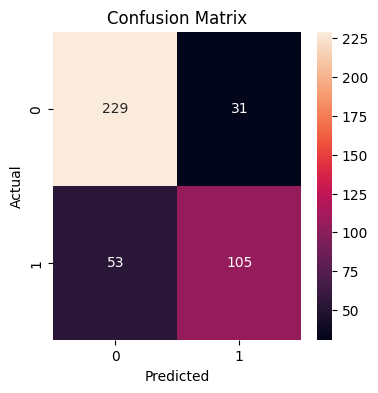

In [ ]:
plt.figure(figsize = (4,4))
cm = sns.heatmap(confusion_matrix(y_test, y_pred), fmt='g', annot=True)
cm.set(title='Confusion Matrix')
cm.set(xlabel='Predicted', ylabel='Actual')
plt.show()

In [ ]:
# get the feature importance
feature_importance = model.get_feature_importance(prettified=True)
feature_importance

,Feature Id,Importances
0,Sex,42.971406
1,Pclass,18.585748
2,Age,11.570046
3,Fare,9.734781
4,SibSp,7.140632
5,Parch,6.359841
6,Embarked_S,1.829718
7,Embarked_C,1.089721
8,Embarked_Q,0.718109


Hyperparameter Tuning

We are going to find the best parameters for the model using GridSearchCV. Also, we are going to use Cross Validation to avoid overfitting.

In [ ]:
'''
cat_for_search = CatBoostClassifier(loss_function='Logloss',
                                    eval_metric='Accuracy',
                                    verbose=False,
                                    random_state=42)

params = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'iterations': [100, 200, 300, 500],
    'l2_leaf_reg': [1, 3, 5, 7],
}

grid = cat_for_search.grid_search(params, Pool(X_train, y_train, cat_features=cat_features), shuffle=True, cv=5, verbose=False,  plot=False)

best_model = CatBoostClassifier(depth=grid['params']['depth'],
                                loss_function='Logloss',
                                eval_metric='Accuracy',
                                use_best_model=True,
                                random_seed=42,
                                verbose=False)

best_model.fit(X_train, y_train, cat_features=cat_features, eval_set = (X_test, y_test))

accuracy_score(y_test, best_model.predict(X_test))
'''

"\ncat_for_search = CatBoostClassifier(loss_function='Logloss',\n                                    eval_metric='Accuracy',\n                                    verbose=False,\n                                    random_state=42)\n\nparams = {\n    'depth': [4, 6, 8, 10],\n    'learning_rate': [0.01, 0.05, 0.1, 0.2],\n    'iterations': [100, 200, 300, 500],\n    'l2_leaf_reg': [1, 3, 5, 7],\n}\n\ngrid = cat_for_search.grid_search(params, Pool(X_train, y_train, cat_features=cat_features), shuffle=True, cv=5, verbose=False,  plot=False)\n\nbest_model = CatBoostClassifier(depth=grid['params']['depth'],\n                                loss_function='Logloss',\n                                eval_metric='Accuracy',\n                                use_best_model=True,\n                                random_seed=42,\n                                verbose=False)\n\nbest_model.fit(X_train, y_train, cat_features=cat_features, eval_set = (X_test, y_test))\n\naccuracy_score(y_test, best_mod